In [125]:
import streamlit as st
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# from sklearn import model_selection
# from sklearn.linear_model import LogisticRegression
import pickle

In [15]:
# set seaborn options globally
colors = ['#365b6d', '#41c1ba', '#289dd2', '#6c9286', '#f2f1ec', '#fa9939']
custom_palette = sns.set_palette(sns.color_palette(colors))
custom_params = {"axes.facecolor": "#f2f1ec", 
"figure.facecolor": "#f2f1ec",
'figure.titleweight': 'bold',
'figure.titlesize': 28,#'large',
'grid.alpha': 1.0,
'font.size': 16.0,
'font.weight': 'bold',
'axes.labelsize': 16,
'axes.labelcolor': '#365b6d',
'axes.titlepad': 10.0,
'axes.titlesize': 'large',
'xtick.labelsize': 16,
'xtick.color': '#365b6d',
'xtick.bottom': True,
'ytick.labelsize': 16,
'ytick.color': '#365b6d',
'ytick.left': True,
'text.color' : '#365b6d',
#'legend.labelcolor': '#365b6d',
'legend.title_fontsize': 12.0,
'legend.frameon': False,
'axes.linewidth': 3,#0.8,
'axes.spines.left': True,
'axes.spines.bottom': True,
'axes.spines.right': True,
'axes.spines.top': True,
'axes.edgecolor': '#365b6d',
'axes.labelweight': 'bold',
'axes.titleweight': 'bold',
'patch.edgecolor': '#f2f1ec'
}
sns.set_theme(style="white", palette=colors, rc=custom_params)

In [16]:
st.write("""
# My first app
Hello *world!*
""")
 
# df = pd.read_csv("my_data.csv")
# st.line_chart(df)

In [17]:
# import processed data set to csv

# import features for tree-based models
X_train_comb = pd.read_csv('../data/petfinder-adoption-prediction/train/X_train_minmax_scaled_processed.csv')
X_test_comb =pd.read_csv('../data/petfinder-adoption-prediction/train/X_test_minmax_scaled_processed.csv')

# import unscaled data for Scaler training


# import target
y_train_comb = pd.read_csv('../data/petfinder-adoption-prediction/train/y_train.csv')
y_test_comb = pd.read_csv('../data/petfinder-adoption-prediction/train/y_test.csv')

gbc = GradientBoostingClassifier(n_estimators=200,subsample=1, max_leaf_nodes=31, max_features='log2', max_depth=5, loss = 'log_loss', learning_rate=0.025, random_state=42)
gbc.fit(X_train_comb,y_train_comb)

/Users/lanacasselmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(learning_rate=0.025, max_depth=5,
                           max_features='log2', max_leaf_nodes=31,
                           n_estimators=200, random_state=42, subsample=1)

In [18]:
# Save Model Using Pickle
# save the model to disk
filename = 'gbc.sav'
# methods for opening a file: "r" - Read - Default value. Opens a file for reading, error if the file does not exist
# "a" - Append - Opens a file for appending, creates the file if it does not exist
# "w" - Write - Opens a file for writing, creates the file if it does not exist
# "x" - Create - Creates the specified file, returns an error if the file exists
# In addition you can specify if the file should be handled as binary or text mode
# "t" - Text - Default value. Text mode
# "b" - Binary - Binary mode (e.g. images)
pickle.dump(gbc, open(filename, 'wb'))

In [126]:
# train scaler
# import df_eda = df_dropped 
df_eda = pd.read_csv('../data/petfinder-adoption-prediction/eda/df_eda.csv')
X_processed = df_eda.drop('adoptionspeed', axis=1)
#train test split with X_processed
y = df_eda["adoptionspeed"]
X_train_processed, X_test_processed, y_train, y_test = train_test_split(X_processed, y, random_state=42, stratify=y)

In [127]:
minmax_scaler = MinMaxScaler()
# scaled the 3 features 
num_features = ['photoamt_11', 'age_bin', 'description_char']
#scaling with the processed data with all dummy columns
minmax_scaler.fit(X_train_processed[num_features])

MinMaxScaler()

In [128]:
pickle.dump(minmax_scaler, open('scaler.sav', 'wb'))

In [122]:
X_train_comb.columns.to_list()

['type',
 'gender',
 'sterilized',
 'breed_type',
 'vaccinated_dewormed',
 'fee_bin',
 'maturitysize_0',
 'maturitysize_1',
 'maturitysize_2',
 'maturitysize_3',
 'furlength_0',
 'furlength_1',
 'furlength_2',
 'health_0',
 'health_1',
 'health_2',
 'color_pattern_0',
 'color_pattern_1',
 'color_pattern_2',
 'photoamt_11',
 'age_bin',
 'description_char']

In [23]:
df_comb = X_train_comb.copy()
df_comb['adoptionspeed']=y_train_comb

In [33]:
type_bin = 0

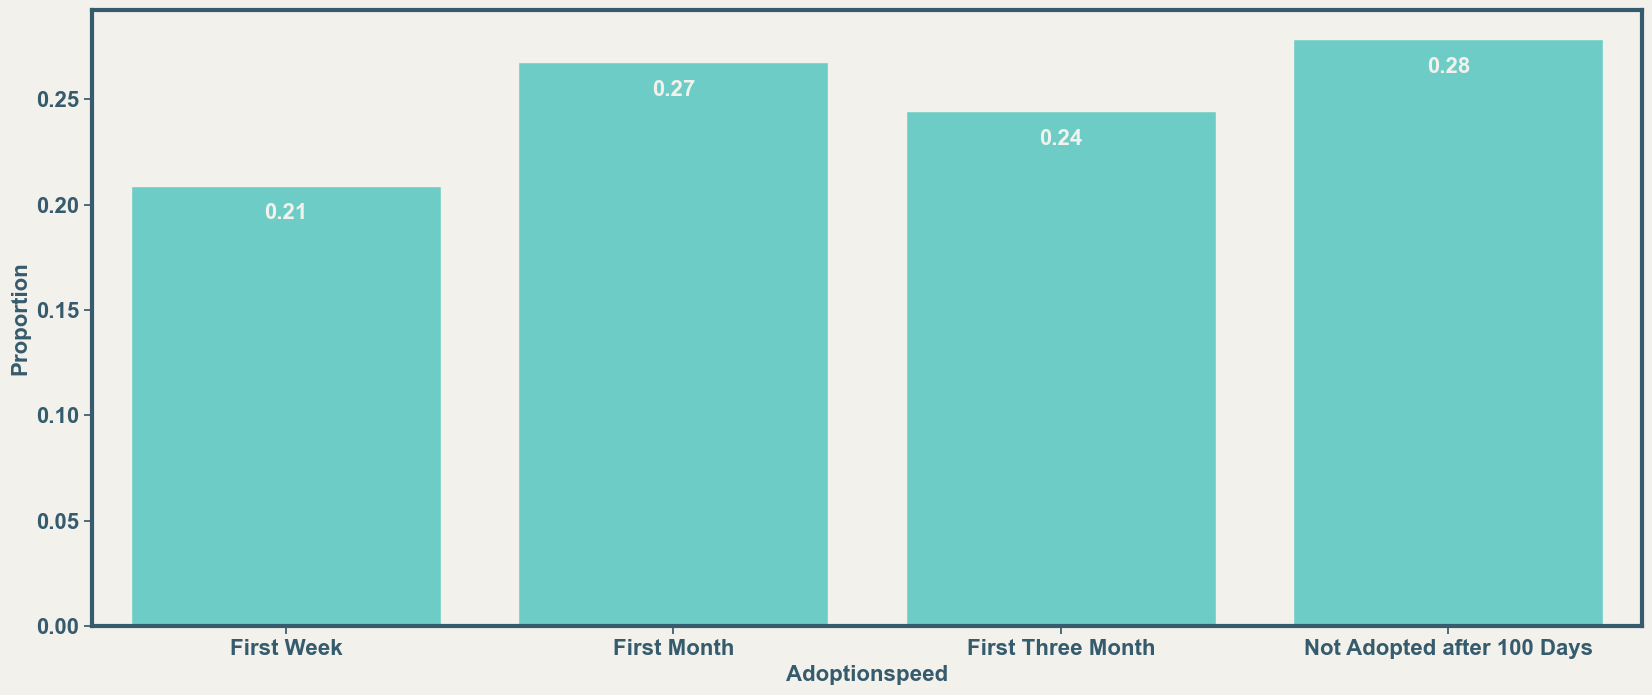

In [35]:
fig = plt.figure(figsize=(20,8))
speed_plot = sns.histplot(
    data=df_comb.query('type==@type_bin'), 
    x='adoptionspeed', stat='proportion', discrete=True,
#    y = 'accuracy',
    color='#41c1ba',
    shrink=.8
    )
plt.xlabel('Adoptionspeed')
#plt.ylabel('Accuracy')
#plt.title('Model Performance on Target Groups')#, fontsize=24)
for g in speed_plot.patches:
    speed_plot.annotate(format(g.get_height(), '.2f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, -20),
                   textcoords = 'offset points',
                   color = '#f2f1ec')
plt.xticks(ticks=np.linspace(1,4,4))
plt.xlim([0.5, 4.5])
speed_plot.set_xticklabels(['First Week','First Month','First Three Month','Not Adopted after 100 Days'])
plt.show();

In [39]:
f'The Distribution of Adoption Speeds for Animals that are {type_in}'

'The Distribution of Adoption Speeds for Animals that are Dogs'

In [119]:
type_in = 'Cat'#'Dog'
type_bin = 0 if type_in == 'Dog' else 1

gender_in = 'Female'#'Male'
gender_bin = 0 if gender_in == 'Male' else 1

sterilized_in = 'Yes'
sterilized_in_bin = 0 if sterilized_in == 'Yes' else 1

breed_type_in = 'Mixed'#'Pure' 
breed_type_bin = 0 if breed_type_in == 'Pure' else 1

vaccinated_dewormed_in = 'Neither'#'Partly'# 'Fully' ])
vaccinated_dewormed_bin = 0 if vaccinated_dewormed_in == 'Fully' else 1 if vaccinated_dewormed_in == 'Partly' else 2

fee_bin_in = 'No'#'Yes'#, ])
fee_bin_bin = 0 if fee_bin_in == 'No' else 1

maturitysize_in = 'Extra Large'#'Small','Medium', 'Large','Extra Large'])
maturitysize_0_bin = 1 if maturitysize_in == 'Small' else 0
maturitysize_1_bin = 1 if maturitysize_in == 'Medium' else 0
maturitysize_2_bin = 1 if maturitysize_in == 'Large' else 0
maturitysize_3_bin = 1 if maturitysize_in == 'Extra Large' else 0

furlength_in = 'Long'#'Short', 'Medium', 'Long'])
furlength_0_bin = 1 if furlength_in == 'Short' else 0
furlength_1_bin = 1 if furlength_in == 'Medium' else 0
furlength_2_bin = 1 if furlength_in == 'Long' else 0

health_in = 'Serious Injury'#'Healthy', 'Minor Injury', 'Serious Injury'])
health_0_bin = 1 if health_in == 'Healthy' else 0
health_1_bin = 1 if health_in == 'Minor Injury' else 0
health_2_bin = 1 if health_in == 'Serious Injury' else 0

color_pattern_in = 'Light'#'Dark', 'Mixed', 'Light'])
color_pattern_0_bin = 1 if color_pattern_in == 'Dark' else 0
color_pattern_1_bin = 1 if color_pattern_in == 'Light' else 0
color_pattern_2_bin = 1 if color_pattern_in == 'Mixed' else 0

photoamt_in = 44
photoamt_11_bin = photoamt_in if photoamt_in <= 11 else 11

age_in = 3
age_bin_bin = 0 if age_in <= 3 else 1 if age_in <= 12 else 2 if age_in <= 72 else 3
# newborn: 0-3 months higher adoption speeds up to this age on average (0)
# puppy/kitten 4-12 (1)
# adult 13-72 month (2)
# senior: >= 73 (3)

description_in = '#### '
description_char = len(description_in)

In [120]:
d =     {'type' : [type_bin],
        'gender' : [gender_bin],
        'sterilized' : [sterilized_in_bin],
        'breed_type' : [breed_type_bin],
        'vaccinated_dewormed' : [vaccinated_dewormed_bin],
        'fee_bin' : [fee_bin_bin],
        'maturitysize_0' : [maturitysize_0_bin],
        'maturitysize_1' : [maturitysize_1_bin],
        'maturitysize_2' : [maturitysize_2_bin],
        'maturitysize_3' : [maturitysize_3_bin],
        'furlength_0' : [furlength_0_bin],
        'furlength_1' : [furlength_1_bin],
        'furlength_2' : [furlength_2_bin],
        'health_0' : [health_0_bin],
        'health_1' : [health_1_bin],
        'health_2' : [health_2_bin],
        'color_pattern_0' : [color_pattern_0_bin],
        'color_pattern_1' : [color_pattern_1_bin],
        'color_pattern_2' : [color_pattern_2_bin],
        'photoamt_11' : [photoamt_11_bin],
        'age_bin' : [age_bin_bin],
        'description_char' : [description_char]}
df_new = pd.DataFrame(data=d)

In [121]:
df_new.T

,0
type,1
gender,1
sterilized,0
breed_type,1
vaccinated_dewormed,2
fee_bin,0
maturitysize_0,0
maturitysize_1,0
maturitysize_2,0
maturitysize_3,1
